In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
crop_dict = {
    "rice": 1,
    "maize": 2,
    "chickpea": 3,
    "kidneybeans": 4,
    "pigeonpeas": 5,
    "mothbeans": 6,
    "mungbean": 7,
    "blackgram": 8,
    "lentil": 9,
    "pomegranate": 10,
    "banana": 11,
    "mango": 12,
    "grapes": 13,
    "watermelon": 14,
    "muskmelon": 15,
    "apple": 16,
    "orange": 17,
    "papaya": 18,
    "coconut": 19,
    "cotton": 20,
    "jute": 21,
    "coffee": 22
}
df["label"] = df["label"].map(crop_dict) 

In [9]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [10]:
df["label"].value_counts()

label
1     100
2     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: count, dtype: int64

<Axes: >

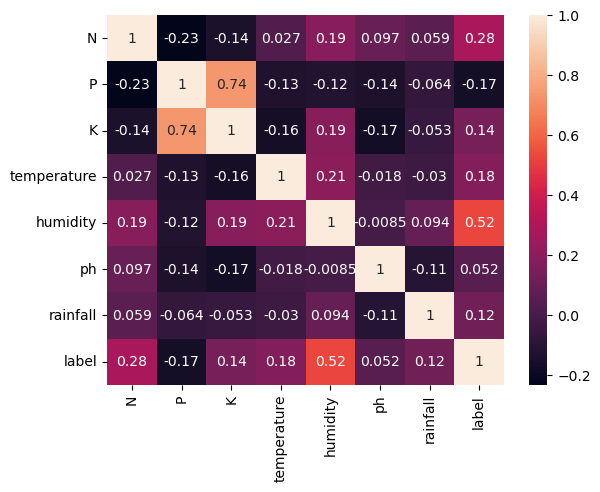

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
X = df.drop(["label"],axis = 1)
y=df["label"]

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.2 , random_state = 42) 

In [14]:
X_train.shape

(440, 7)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [16]:
models = {
    "Logistic Regression" : LogisticRegression(max_iter=500, solver='saga'),
    "SVC" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier()
}

In [17]:
for name, model in models.items():  
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 
    score = accuracy_score(y_test, y_pred) 
    print(f"{name} model with accuracy:",score*100)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression model with accuracy: 93.35227272727272
SVC model with accuracy: 93.69318181818181
Decision Tree model with accuracy: 95.68181818181817
Random Forest model with accuracy: 98.75


In [18]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
accuracy_score(y_pred,y_test)

0.9846590909090909

In [19]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [20]:
# def prediction(N,P,K,temperature,humidity,ph,rainfall):
#     features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
#     # scaler_feature = scaler.fit_transform(features)
#     prediction = RF.predict(features).reshape(1,-1)
#     return prediction[0]
def prediction(N, P, K, temperature, humidity, ph, rainfall):
    features = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]], 
                            columns=X_train.columns)  # Ensure feature names match
    prediction = RF.predict(features)
    return prediction[0]


In [21]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [22]:
df.tail(2)

,N,P,K,temperature,humidity,ph,rainfall,label
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,22


In [23]:
N =90
P =42
K =43
temperature =20
humidity=82
ph=6.5
rainfall =202

predict = prediction(N,P,K,temperature,humidity,ph,rainfall)

In [24]:
predict

1

In [53]:
reverse_crop_dict = {v: k for k, v in crop_dict.items()}  # Reverse mapping

def prediction(N, P, K, temperature, humidity, ph, rainfall):
    features = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]], 
                            columns=X_train.columns)
    pred_label = RF.predict(features)[0]
    return reverse_crop_dict[pred_label]  # Convert number to crop name


In [57]:
N =90
P =42
K =43
temperature =20
humidity=82
ph=6.5
rainfall =202

predict = prediction(N,P,K,temperature,humidity,ph,rainfall)


In [26]:
import pickle
pickle.dump(RF , open("RF_model.pkl","wb"))